# TaxiDemandPredictionAssignment

In [1]:
import os 
import glob
import pandas  as pd

Import the libraries required for Feature engineering.

In [2]:
# Specify the folder path where your JSON files are located
folder_path = 'Jan2022Jul2023'

# Create an empty DataFrame to store the combined data
data = pd.DataFrame()

# Loop through all the files in the specified folder, check if they are JSON files, and read them into a DataFrame
for filename in os.listdir(folder_path):
    if filename.endswith('.json'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_json(file_path)
        data = pd.concat([data, df], ignore_index=True)

Here, The script reads multiple JSON files from a specified folder and combines them into a single pandas DataFrame.

In [3]:
data.head()

,driverId,tripId,startLocation,tripDistance,tripSpeed,tripDuration,endLocation,startTime,tripFare,paymentType,endTime
0,1,0,"[23.067647, 72.566629]",6.5,18.72,21,"[23.125884, 72.566629]",2022-01-01T19:23:00,71,upi,2022-01-01T19:43:00
1,1,1,"[22.989396, 72.586156]",8.7,17.22,30,"[23.044864, 72.646446]",2022-01-01T21:19:00,93,cash,2022-01-01T21:49:00
2,1,2,"[23.084192, 72.529666]",2.4,17.92,8,"[23.099364, 72.546162]",2022-01-01T22:19:00,30,cash,2022-01-01T22:26:00
3,1,3,"[22.971624, 72.525195]",1.5,20.19,4,"[22.971623, 72.539412]",2022-01-01T22:38:00,21,cash,2022-01-01T22:42:00
4,1,4,"[23.059013, 72.524127]",6.0,15.42,23,"[23.103218, 72.557781]",2022-01-01T22:54:00,66,upi,2022-01-01T23:17:00


In [4]:

data.shape

(99017, 11)

* Shape of the given dataset.
* It has 11 Column and 99017 Rows

In [5]:
col_name = data.columns
col_name

Index(['driverId', 'tripId', 'startLocation', 'tripDistance', 'tripSpeed',
       'tripDuration', 'endLocation', 'startTime', 'tripFare', 'paymentType',
       'endTime'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99017 entries, 0 to 99016
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   driverId       99017 non-null  int64  
 1   tripId         99017 non-null  int64  
 2   startLocation  99017 non-null  object 
 3   tripDistance   99017 non-null  float64
 4   tripSpeed      99017 non-null  float64
 5   tripDuration   99017 non-null  int64  
 6   endLocation    99017 non-null  object 
 7   startTime      99017 non-null  object 
 8   tripFare       99017 non-null  int64  
 9   paymentType    99017 non-null  object 
 10  endTime        99017 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 8.3+ MB


* This is the concise summary of the structure and content of a DataFrame. 

In [7]:
data.isnull().sum()

driverId         0
tripId           0
startLocation    0
tripDistance     0
tripSpeed        0
tripDuration     0
endLocation      0
startTime        0
tripFare         0
paymentType      0
endTime          0
dtype: int64

* Checking the Null Values present in the given Dataset.
* There is no Null values in the dataset.

In [8]:
# List of columns to process
columns_to_process = ['startLocation', 'endLocation']

# Remove square brackets '[' and ']' from specified columns, handling NaN values
for col in columns_to_process:
    data[col] = data[col].apply(lambda x: str(x).replace('[', '').replace(']', '') if pd.notna(x).any() else x)
    

* In the dataset, the columns “startLocation” and "endLocation" are given in the list format.
* So we need to remove those “[“ and “]”.
* This script iterates over specified columns in combined_data and removes square brackets from each cell, handling NaN values appropriately. 
* The modified DataFrame is then stored back in the same columns.

In [9]:
data.head()

,driverId,tripId,startLocation,tripDistance,tripSpeed,tripDuration,endLocation,startTime,tripFare,paymentType,endTime
0,1,0,"23.067647, 72.566629",6.5,18.72,21,"23.125884, 72.566629",2022-01-01T19:23:00,71,upi,2022-01-01T19:43:00
1,1,1,"22.989396, 72.586156",8.7,17.22,30,"23.044864, 72.646446",2022-01-01T21:19:00,93,cash,2022-01-01T21:49:00
2,1,2,"23.084192, 72.529666",2.4,17.92,8,"23.099364, 72.546162",2022-01-01T22:19:00,30,cash,2022-01-01T22:26:00
3,1,3,"22.971624, 72.525195",1.5,20.19,4,"22.971623, 72.539412",2022-01-01T22:38:00,21,cash,2022-01-01T22:42:00
4,1,4,"23.059013, 72.524127",6.0,15.42,23,"23.103218, 72.557781",2022-01-01T22:54:00,66,upi,2022-01-01T23:17:00


In [10]:
# find categorical variables

categorical = [var for var in data.columns if data[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 5 categorical variables

The categorical variables are : ['startLocation', 'endLocation', 'startTime', 'paymentType', 'endTime']


In [11]:
# find numerical variables

numerical = [var for var in data.columns if data[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 6 numerical variables

The numerical variables are : ['driverId', 'tripId', 'tripDistance', 'tripSpeed', 'tripDuration', 'tripFare']


In [13]:
data['startTime']

0        2022-01-01T19:23:00
1        2022-01-01T21:19:00
2        2022-01-01T22:19:00
3        2022-01-01T22:38:00
4        2022-01-01T22:54:00
                ...         
99012    2023-07-30T22:17:00
99013    2023-07-30T22:56:00
99014    2023-07-31T19:47:00
99015    2023-07-31T22:13:00
99016    2023-07-31T22:58:00
Name: startTime, Length: 99017, dtype: object

##########################

* The "startTime" column is having data like - 2023-07-31T22:13:00.
* Now, I am performing several operation on it like,

1) Converts the 'startTime' column to a pandas datetime type.

2) Creating Two new columns, 'start_date' and 'start_time' from the 'startTime' column.

3) removing the original 'startTime' column from the DataFrame to keep only the newly created 'start_date' and 'start_time' columns.

In [14]:
# Convert the 'datetime_column' to datetime type
data['startTime'] = pd.to_datetime(data['startTime'])

In [15]:
# Create new columns 'start_date' and 'start_time'
data['start_date'] = data['startTime'].dt.strftime('%Y-%m-%d')

data['start_time'] = data['startTime'].dt.strftime('%H:%M:%S')

data.drop(columns=['startTime'],axis=1, inplace=True)

In [16]:
data.head()

,driverId,tripId,startLocation,tripDistance,tripSpeed,tripDuration,endLocation,tripFare,paymentType,endTime,start_date,start_time
0,1,0,"23.067647, 72.566629",6.5,18.72,21,"23.125884, 72.566629",71,upi,2022-01-01T19:43:00,2022-01-01,19:23:00
1,1,1,"22.989396, 72.586156",8.7,17.22,30,"23.044864, 72.646446",93,cash,2022-01-01T21:49:00,2022-01-01,21:19:00
2,1,2,"23.084192, 72.529666",2.4,17.92,8,"23.099364, 72.546162",30,cash,2022-01-01T22:26:00,2022-01-01,22:19:00
3,1,3,"22.971624, 72.525195",1.5,20.19,4,"22.971623, 72.539412",21,cash,2022-01-01T22:42:00,2022-01-01,22:38:00
4,1,4,"23.059013, 72.524127",6.0,15.42,23,"23.103218, 72.557781",66,upi,2022-01-01T23:17:00,2022-01-01,22:54:00


* So, Now we have 2 new columns "start_date" and "start_time" as per above.

* In the similar manner, will do for the column "endTime".

In [17]:
# Convert the 'datetime_column' to datetime type
data['endTime'] = pd.to_datetime(data['endTime'])

In [18]:
# Create new columns 'start_date' and 'start_time'
data['end_date'] = data['endTime'].dt.strftime('%Y-%m-%d')

data['end_time'] = data['endTime'].dt.strftime('%H:%M:%S')

data.drop(columns=['endTime'],axis=1, inplace=True)

In [19]:
data.head()

,driverId,tripId,startLocation,tripDistance,tripSpeed,tripDuration,endLocation,tripFare,paymentType,start_date,start_time,end_date,end_time
0,1,0,"23.067647, 72.566629",6.5,18.72,21,"23.125884, 72.566629",71,upi,2022-01-01,19:23:00,2022-01-01,19:43:00
1,1,1,"22.989396, 72.586156",8.7,17.22,30,"23.044864, 72.646446",93,cash,2022-01-01,21:19:00,2022-01-01,21:49:00
2,1,2,"23.084192, 72.529666",2.4,17.92,8,"23.099364, 72.546162",30,cash,2022-01-01,22:19:00,2022-01-01,22:26:00
3,1,3,"22.971624, 72.525195",1.5,20.19,4,"22.971623, 72.539412",21,cash,2022-01-01,22:38:00,2022-01-01,22:42:00
4,1,4,"23.059013, 72.524127",6.0,15.42,23,"23.103218, 72.557781",66,upi,2022-01-01,22:54:00,2022-01-01,23:17:00


### Convert Start time column into Hour, time and Minute

* The Column "Start_time" is having converting it to a datetime type, and then extracting hour, minute, and second components into separate columns

In [20]:
converted_datetime = pd.to_datetime(data['start_time'])

In [21]:
# omit the milliseconds
converted_datetime = converted_datetime.dt.strftime('%H:%M:%S')

In [22]:
# using the method strftime converts the output as string. Convert it back as type datetime.
converted_datetime = pd.to_datetime(converted_datetime)

In [23]:
data['start_time_hour'] = converted_datetime.dt.hour
data['start_time_minute'] = converted_datetime.dt.minute
data['start_time_second'] = converted_datetime.dt.second

* Time information by breaking it down into distinct hour, minute, and second components, making it more suitable for various analytical tasks.

In [24]:
data.drop(columns=['start_time'],axis=1, inplace=True)

In [25]:
data.head()

,driverId,tripId,startLocation,tripDistance,tripSpeed,tripDuration,endLocation,tripFare,paymentType,start_date,end_date,end_time,start_time_hour,start_time_minute,start_time_second
0,1,0,"23.067647, 72.566629",6.5,18.72,21,"23.125884, 72.566629",71,upi,2022-01-01,2022-01-01,19:43:00,19,23,0
1,1,1,"22.989396, 72.586156",8.7,17.22,30,"23.044864, 72.646446",93,cash,2022-01-01,2022-01-01,21:49:00,21,19,0
2,1,2,"23.084192, 72.529666",2.4,17.92,8,"23.099364, 72.546162",30,cash,2022-01-01,2022-01-01,22:26:00,22,19,0
3,1,3,"22.971624, 72.525195",1.5,20.19,4,"22.971623, 72.539412",21,cash,2022-01-01,2022-01-01,22:42:00,22,38,0
4,1,4,"23.059013, 72.524127",6.0,15.42,23,"23.103218, 72.557781",66,upi,2022-01-01,2022-01-01,23:17:00,22,54,0


### Convert End time column into Hour, time and Minute

In [26]:
# convert to variable type datetime
converted_datetime = pd.to_datetime(data['end_time'])

# omit the milliseconds
converted_datetime = converted_datetime.dt.strftime('%H:%M:%S')

In [27]:
# using the method strftime converts the output as string. Convert it back as type datetime.
converted_datetime = pd.to_datetime(converted_datetime)

In [28]:
data['end_time_hour'] = converted_datetime.dt.hour
data['end_time_minute'] = converted_datetime.dt.minute
data['end_time_second'] = converted_datetime.dt.second

In [29]:
data.head()

,driverId,tripId,startLocation,tripDistance,tripSpeed,tripDuration,endLocation,tripFare,paymentType,start_date,end_date,end_time,start_time_hour,start_time_minute,start_time_second,end_time_hour,end_time_minute,end_time_second
0,1,0,"23.067647, 72.566629",6.5,18.72,21,"23.125884, 72.566629",71,upi,2022-01-01,2022-01-01,19:43:00,19,23,0,19,43,0
1,1,1,"22.989396, 72.586156",8.7,17.22,30,"23.044864, 72.646446",93,cash,2022-01-01,2022-01-01,21:49:00,21,19,0,21,49,0
2,1,2,"23.084192, 72.529666",2.4,17.92,8,"23.099364, 72.546162",30,cash,2022-01-01,2022-01-01,22:26:00,22,19,0,22,26,0
3,1,3,"22.971624, 72.525195",1.5,20.19,4,"22.971623, 72.539412",21,cash,2022-01-01,2022-01-01,22:42:00,22,38,0,22,42,0
4,1,4,"23.059013, 72.524127",6.0,15.42,23,"23.103218, 72.557781",66,upi,2022-01-01,2022-01-01,23:17:00,22,54,0,23,17,0


In [30]:
data.drop(columns=['end_time'],axis=1, inplace=True)

In [31]:
data.head()

,driverId,tripId,startLocation,tripDistance,tripSpeed,tripDuration,endLocation,tripFare,paymentType,start_date,end_date,start_time_hour,start_time_minute,start_time_second,end_time_hour,end_time_minute,end_time_second
0,1,0,"23.067647, 72.566629",6.5,18.72,21,"23.125884, 72.566629",71,upi,2022-01-01,2022-01-01,19,23,0,19,43,0
1,1,1,"22.989396, 72.586156",8.7,17.22,30,"23.044864, 72.646446",93,cash,2022-01-01,2022-01-01,21,19,0,21,49,0
2,1,2,"23.084192, 72.529666",2.4,17.92,8,"23.099364, 72.546162",30,cash,2022-01-01,2022-01-01,22,19,0,22,26,0
3,1,3,"22.971624, 72.525195",1.5,20.19,4,"22.971623, 72.539412",21,cash,2022-01-01,2022-01-01,22,38,0,22,42,0
4,1,4,"23.059013, 72.524127",6.0,15.42,23,"23.103218, 72.557781",66,upi,2022-01-01,2022-01-01,22,54,0,23,17,0


In [32]:
data.shape

(99017, 17)

In [33]:
col_name = data.columns
col_name

Index(['driverId', 'tripId', 'startLocation', 'tripDistance', 'tripSpeed',
       'tripDuration', 'endLocation', 'tripFare', 'paymentType', 'start_date',
       'end_date', 'start_time_hour', 'start_time_minute', 'start_time_second',
       'end_time_hour', 'end_time_minute', 'end_time_second'],
      dtype='object')

In [34]:
print(data.start_time_second.unique())

[0]


* Removing "Seconds" from the dataset.
* As it has all the values as "0" only.

In [37]:
data.drop(columns=['end_time_second','start_time_second'],axis=1, inplace=True)

In [38]:
data.head()

,driverId,tripId,startLocation,tripDistance,tripSpeed,tripDuration,endLocation,tripFare,paymentType,start_date,end_date,start_time_hour,start_time_minute,end_time_hour,end_time_minute
0,1,0,"23.067647, 72.566629",6.5,18.72,21,"23.125884, 72.566629",71,upi,2022-01-01,2022-01-01,19,23,19,43
1,1,1,"22.989396, 72.586156",8.7,17.22,30,"23.044864, 72.646446",93,cash,2022-01-01,2022-01-01,21,19,21,49
2,1,2,"23.084192, 72.529666",2.4,17.92,8,"23.099364, 72.546162",30,cash,2022-01-01,2022-01-01,22,19,22,26
3,1,3,"22.971624, 72.525195",1.5,20.19,4,"22.971623, 72.539412",21,cash,2022-01-01,2022-01-01,22,38,22,42
4,1,4,"23.059013, 72.524127",6.0,15.42,23,"23.103218, 72.557781",66,upi,2022-01-01,2022-01-01,22,54,23,17


### Split the 'startLocation' column into 'startLatitude' and 'startLongitude'

In [39]:
# Split the 'startLocation' column into 'startLatitude' and 'startLongitude'

data[['startLatitude', 'startLongitude']] = data['startLocation'].str.split(', ', expand=True)

In [40]:
data.head()

,driverId,tripId,startLocation,tripDistance,tripSpeed,tripDuration,endLocation,tripFare,paymentType,start_date,end_date,start_time_hour,start_time_minute,end_time_hour,end_time_minute,startLatitude,startLongitude
0,1,0,"23.067647, 72.566629",6.5,18.72,21,"23.125884, 72.566629",71,upi,2022-01-01,2022-01-01,19,23,19,43,23.067647,72.566629
1,1,1,"22.989396, 72.586156",8.7,17.22,30,"23.044864, 72.646446",93,cash,2022-01-01,2022-01-01,21,19,21,49,22.989396,72.586156
2,1,2,"23.084192, 72.529666",2.4,17.92,8,"23.099364, 72.546162",30,cash,2022-01-01,2022-01-01,22,19,22,26,23.084192,72.529666
3,1,3,"22.971624, 72.525195",1.5,20.19,4,"22.971623, 72.539412",21,cash,2022-01-01,2022-01-01,22,38,22,42,22.971624,72.525195
4,1,4,"23.059013, 72.524127",6.0,15.42,23,"23.103218, 72.557781",66,upi,2022-01-01,2022-01-01,22,54,23,17,23.059013,72.524127


### Split the 'startLocation' column into 'startLatitude' and 'startLongitude'

In [41]:
# Split the 'startLocation' column into 'startLatitude' and 'startLongitude'
data[['endLatitude', 'endLongitude']] = data['endLocation'].str.split(', ', expand=True)

In [42]:
data.head()

,driverId,tripId,startLocation,tripDistance,tripSpeed,tripDuration,endLocation,tripFare,paymentType,start_date,end_date,start_time_hour,start_time_minute,end_time_hour,end_time_minute,startLatitude,startLongitude,endLatitude,endLongitude
0,1,0,"23.067647, 72.566629",6.5,18.72,21,"23.125884, 72.566629",71,upi,2022-01-01,2022-01-01,19,23,19,43,23.067647,72.566629,23.125884,72.566629
1,1,1,"22.989396, 72.586156",8.7,17.22,30,"23.044864, 72.646446",93,cash,2022-01-01,2022-01-01,21,19,21,49,22.989396,72.586156,23.044864,72.646446
2,1,2,"23.084192, 72.529666",2.4,17.92,8,"23.099364, 72.546162",30,cash,2022-01-01,2022-01-01,22,19,22,26,23.084192,72.529666,23.099364,72.546162
3,1,3,"22.971624, 72.525195",1.5,20.19,4,"22.971623, 72.539412",21,cash,2022-01-01,2022-01-01,22,38,22,42,22.971624,72.525195,22.971623,72.539412
4,1,4,"23.059013, 72.524127",6.0,15.42,23,"23.103218, 72.557781",66,upi,2022-01-01,2022-01-01,22,54,23,17,23.059013,72.524127,23.103218,72.557781


In [43]:
data.drop(columns=['startLocation','endLocation','driverId','tripId'],axis=1, inplace=True)

In [44]:
data.head()

,tripDistance,tripSpeed,tripDuration,tripFare,paymentType,start_date,end_date,start_time_hour,start_time_minute,end_time_hour,end_time_minute,startLatitude,startLongitude,endLatitude,endLongitude
0,6.5,18.72,21,71,upi,2022-01-01,2022-01-01,19,23,19,43,23.067647,72.566629,23.125884,72.566629
1,8.7,17.22,30,93,cash,2022-01-01,2022-01-01,21,19,21,49,22.989396,72.586156,23.044864,72.646446
2,2.4,17.92,8,30,cash,2022-01-01,2022-01-01,22,19,22,26,23.084192,72.529666,23.099364,72.546162
3,1.5,20.19,4,21,cash,2022-01-01,2022-01-01,22,38,22,42,22.971624,72.525195,22.971623,72.539412
4,6.0,15.42,23,66,upi,2022-01-01,2022-01-01,22,54,23,17,23.059013,72.524127,23.103218,72.557781


In [45]:
data['paymentType'] = data['paymentType'].map({'upi':1, 'cash':0})

* The given script is mapping values in the 'paymentType' column of a pandas DataFrame to binary values (1 for 'upi' and 0 for 'cash')

In [46]:
data.head()

,tripDistance,tripSpeed,tripDuration,tripFare,paymentType,start_date,end_date,start_time_hour,start_time_minute,end_time_hour,end_time_minute,startLatitude,startLongitude,endLatitude,endLongitude
0,6.5,18.72,21,71,1,2022-01-01,2022-01-01,19,23,19,43,23.067647,72.566629,23.125884,72.566629
1,8.7,17.22,30,93,0,2022-01-01,2022-01-01,21,19,21,49,22.989396,72.586156,23.044864,72.646446
2,2.4,17.92,8,30,0,2022-01-01,2022-01-01,22,19,22,26,23.084192,72.529666,23.099364,72.546162
3,1.5,20.19,4,21,0,2022-01-01,2022-01-01,22,38,22,42,22.971624,72.525195,22.971623,72.539412
4,6.0,15.42,23,66,1,2022-01-01,2022-01-01,22,54,23,17,23.059013,72.524127,23.103218,72.557781


### Visualization of the data

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

Text(0.5, 1.0, 'Mode of payment')

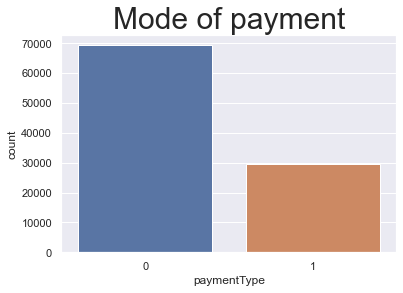

In [48]:
sns.countplot(x='paymentType', data=data)

plt.title('Mode of payment', fontsize=30)

* Number of count of mode of Payment done for Taxi ride

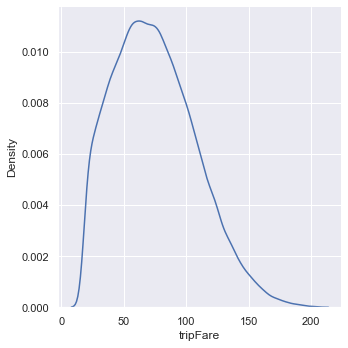

In [49]:
# check the distribution of values in column "ride_value"

sns.displot(data, x="tripFare", kind="kde")

<AxesSubplot:ylabel='tripDuration'>

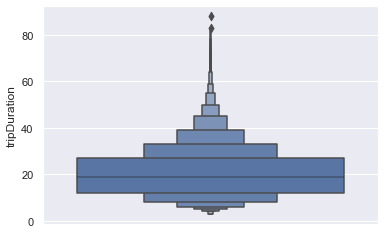

In [50]:
# check the distribution of values in column "ride_value"

sns.boxenplot(y="tripDuration", data=data)

* A boxen plot is used to visualize the distribution of a continuous variable, 'tripDuration. 
* It displays information about the central tendency, spread, and shape of the distribution. 
* This Box Plot is giving an IQR values , and look like it has some outliers outside the range.

<AxesSubplot:ylabel='tripSpeed'>

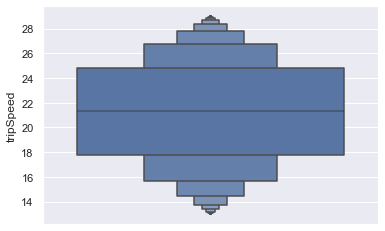

In [51]:
# check the distribution of values in column "ride_value"

sns.boxenplot(y="tripSpeed", data=data)

<AxesSubplot:ylabel='tripDistance'>

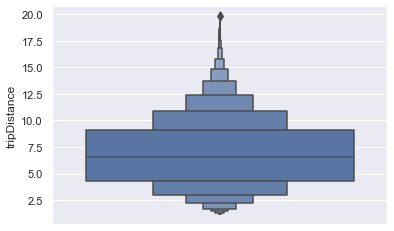

In [52]:
# check the distribution of values in column "ride_value"

sns.boxenplot(y="tripDistance", data=data)

* Calculate the first quartile (Q1), third quartile (Q3), and IQR for 'tripDuration'

In [54]:
# Calculate the first quartile (Q1), third quartile (Q3), and IQR for 'tripDuration'
Q1 = data['tripDuration'].quantile(0.25)
Q3 = data['tripDuration'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for identifying outliers based on the IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [55]:
# Filter out values outside the defined range

data = data[(data['tripDuration'] >= lower_bound) & (data['tripDuration'] <= upper_bound)]

<AxesSubplot:ylabel='tripDuration'>

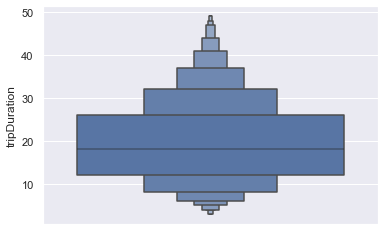

In [56]:
# check the distribution of values in column "ride_value"

sns.boxenplot(y="tripDuration", data=data)

#### Note: The size of the outliers is not significant; therefore, we can proceed forward.

The boxen plot visualization of the given columns indicates that while there are some outliers, their size is not considerable. Outliers, which are data points significantly different from the majority, can sometimes impact statistical analyses or machine learning models. In this case, the relatively small size of the outliers suggests that they may not heavily influence subsequent analyses.

Proceeding forward, we can take this into consideration and continue with data exploration, feature engineering, or any further steps in the analysis pipeline. It's essential to be aware of the presence of outliers and assess their impact on the specific goals of the analysis.

In [58]:
data.head(5)

,tripDistance,tripSpeed,tripDuration,tripFare,paymentType,start_date,end_date,start_time_hour,start_time_minute,end_time_hour,end_time_minute,startLatitude,startLongitude,endLatitude,endLongitude
0,6.5,18.72,21,71,1,2022-01-01,2022-01-01,19,23,19,43,23.067647,72.566629,23.125884,72.566629
1,8.7,17.22,30,93,0,2022-01-01,2022-01-01,21,19,21,49,22.989396,72.586156,23.044864,72.646446
2,2.4,17.92,8,30,0,2022-01-01,2022-01-01,22,19,22,26,23.084192,72.529666,23.099364,72.546162
3,1.5,20.19,4,21,0,2022-01-01,2022-01-01,22,38,22,42,22.971624,72.525195,22.971623,72.539412
4,6.0,15.42,23,66,1,2022-01-01,2022-01-01,22,54,23,17,23.059013,72.524127,23.103218,72.557781


In [60]:
data.to_csv('dataset.csv')

* Now lets exports the DataFrame (data) to a CSV (Comma-Separated Values) file named 'dataset.csv'. 
* Using this file, we can the processed and modified data to a file for future use or sharing.

### Model Training

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.pipeline import Pipeline

* In the given code, I have imported several essential libraries and modules for data manipulation, machine learning, and time series analysis.


#### Data Handling:
* Imports pandas for efficient data manipulation and numpy for numerical operations.

#### Data Splitting:
* Utilizes train_test_split from scikit-learn for dividing datasets into training and testing sets.
* Machine Learning Models:

#### Incorporates various regression models:
* LinearRegression for basic linear modeling.
* XGBRegressor from XGBoost for powerful ensemble learning.
* MLPRegressor for neural network-based regression.

#### Time Series Analysis:

* Imports the ARIMA model from statsmodels for time series forecasting.

#### Model Evaluation:

* Utilizes mean_squared_error for evaluating regression model performance.

#### Workflow Streamlining:

* Incorporates the Pipeline class to create a sequential processing pipeline.

In [6]:
# Load the dataset
data_main = pd.read_csv('dataset.csv')  # Replace 'your_dataset.csv' with the actual file path

In [3]:
data_main.head()

,Unnamed: 0,tripDistance,tripSpeed,tripDuration,tripFare,paymentType,start_date,end_date,start_time_hour,start_time_minute,end_time_hour,end_time_minute,startLatitude,startLongitude,endLatitude,endLongitude
0,0,6.5,18.72,21,71,1,2022-01-01,2022-01-01,19,23,19,43,23.067647,72.566629,23.125884,72.566629
1,1,8.7,17.22,30,93,0,2022-01-01,2022-01-01,21,19,21,49,22.989396,72.586156,23.044864,72.646446
2,2,2.4,17.92,8,30,0,2022-01-01,2022-01-01,22,19,22,26,23.084192,72.529666,23.099364,72.546162
3,3,1.5,20.19,4,21,0,2022-01-01,2022-01-01,22,38,22,42,22.971624,72.525195,22.971623,72.539412
4,4,6.0,15.42,23,66,1,2022-01-01,2022-01-01,22,54,23,17,23.059013,72.524127,23.103218,72.557781


In [4]:
data_main.columns

Index(['Unnamed: 0', 'tripDistance', 'tripSpeed', 'tripDuration', 'tripFare',
       'paymentType', 'start_date', 'end_date', 'start_time_hour',
       'start_time_minute', 'end_time_hour', 'end_time_minute',
       'startLatitude', 'startLongitude', 'endLatitude', 'endLongitude'],
      dtype='object')

In [4]:
# Feature engineering
data_main['start_datetime'] = pd.to_datetime(data_main['start_date'] + ' ' + data_main['start_time_hour'].astype(str) + ':' + data_main['start_time_minute'].astype(str))

data_main['end_datetime'] = pd.to_datetime(data_main['end_date'] + ' ' + data_main['end_time_hour'].astype(str) + ':' + data_main['end_time_minute'].astype(str))

* This feature engineering step is to extract temporal information from separate date and time columns, creating new datetime features for both the start and end times of taxi rides.

#### Temporal Analysis:
* The new datetime features enable temporal analysis, allowing for insights into patterns and trends related to taxi ride start and end times.

#### Model Input:
* These features can be used as input for machine learning models, capturing the temporal aspect of taxi demand.

In [5]:
# Extract relevant features
data_main['hour'] = data_main['start_datetime'].dt.hour
data_main['minute'] = data_main['start_datetime'].dt.minute
data_main['day_of_week'] = data_main['start_datetime'].dt.dayofweek

* This code involves extracting specific time-related features from the newly created 'start_datetime' column. 

#### Hour Feature:
* data_main['hour']: Creates a new column named 'hour' in the DataFrame (data_main).
data_main['start_datetime'].dt.hour: Extracts the hour component from the 'start_datetime' column.

#### Minute Feature:
* data_main['minute']: Creates a new column named 'minute' in the DataFrame (data_main).
data_main['start_datetime'].dt.minute: Extracts the minute component from the 'start_datetime' column.

#### Day of Week Feature:
* data_main['day_of_week']: Creates a new column named 'day_of_week' in the DataFrame (data_main).
data_main['start_datetime'].dt.dayofweek: Extracts the day of the week (as an integer, where Monday is 0 and Sunday is 6) from the 'start_datetime' column.

#### Benefits
* These features provide more detailed temporal information, capturing the hour, minute, and day of the week of taxi ride starts.

* Enhances the dataset with features that can potentially reveal patterns or trends based on specific times of the day or days of the week.

In [6]:
# Select features
features = ['tripDistance', 'tripSpeed', 'startLatitude', 'startLongitude', 'endLatitude', 
            'endLongitude', 'hour', 'minute', 'day_of_week']

# Define target variable
target = 'tripDuration'

### Purpose:
This section focuses on identifying the key features for modeling and specifying the target variable, essential for training a predictive model.

#### Selected Features:
The chosen features for modeling are as follows:

* tripDistance: Distance covered during the trip.
* tripSpeed: Speed during the trip.
* startLatitude, startLongitude: Latitude and longitude of the starting point.
* endLatitude, endLongitude: Latitude and longitude of the ending point.
* hour, minute: Hour and minute of the taxi ride start.
* day_of_week: Day of the week of the taxi ride start.

#### Target Variable:
* tripDuration: The variable representing the duration of the taxi ride, which serves as the target variable for prediction.

### Importance of Feature Selection:
#### Relevance to Prediction:

* The selected features are chosen based on their potential impact on predicting the target variable, 'tripDuration.'

#### Dimensionality Reduction:
* Focusing on key features helps prevent overfitting and reduces the dimensionality of the model.

# Train-test split

In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(data_main[features], data_main[target], test_size=0.2, random_state=42)

#### Split Ratio:
The dataset is split into a training set (X_train, y_train) and a testing set (X_test, y_test).

* The training set (80% of the data) is used to train the model.
* The testing set (20% of the data) is reserved for evaluating the model's performance on unseen data.

# Linear Regression

In [8]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)
print(f"Linear Regression MSE: {mean_squared_error(y_test, linear_pred)}")

Linear Regression MSE: 4.269871191812226


#### Print the scores on training and test set for Linear Regression

In [9]:
# print the scores on training and test set for Linear Regression

print('Training set score: {:.4f}'.format(linear_model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(linear_model.score(X_test, y_test)))

Training set score: 0.9585
Test set score: 0.9579


# Random Forest Regressor

In [11]:
# Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print(f"Random Forest MSE: {mean_squared_error(y_test, rf_pred)}")

Random Forest MSE: 0.07234713522948968


#### Print the scores on training and test set for Random Forest Regressor

In [12]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(rf_model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(rf_model.score(X_test, y_test)))

Training set score: 0.9999
Test set score: 0.9993


# XGBoost

In [13]:
# XGBoost
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
print(f"XGBoost MSE: {mean_squared_error(y_test, xgb_pred)}")

XGBoost MSE: 0.12341206627706089


#### Print the scores on training and test set for XGBoost

In [14]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(xgb_model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(xgb_model.score(X_test, y_test)))

Training set score: 0.9990
Test set score: 0.9988


# Deep Neural Network

In [16]:
# Deep Neural Network
scaler = StandardScaler()
mlp_model = MLPRegressor(max_iter=500)
pipeline = Pipeline([('scaler', scaler), ('mlp', mlp_model)])
pipeline.fit(X_train, y_train)
mlp_pred = pipeline.predict(X_test)
print(f"MLP Regression MSE: {mean_squared_error(y_test, mlp_pred)}")

MLP Regression MSE: 0.09668115723337924


#### Print the scores on training and test set for Deep Neural Network

In [23]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(pipeline.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(pipeline.score(X_test, y_test)))

Training set score: 0.9991
Test set score: 0.9990


# ARIMA

In [17]:
# ARIMA (AutoRegressive Integrated Moving Average)
arima_model = ARIMA(data[target], order=(5, 1, 0))
arima_results = arima_model.fit()
arima_pred = arima_results.predict(start=len(data)-len(X_test), end=len(data)-1, typ='levels')
print(f"ARIMA MSE: {mean_squared_error(y_test, arima_pred)}")

ARIMA MSE: 117.46874067417359


In [24]:
# Print summary statistics
print(arima_results.summary())

                               SARIMAX Results                                
Dep. Variable:           tripDuration   No. Observations:                97386
Model:                 ARIMA(5, 1, 0)   Log Likelihood             -369763.333
Date:                Sat, 23 Dec 2023   AIC                         739538.666
Time:                        22:47:30   BIC                         739595.585
Sample:                             0   HQIC                        739555.960
                              - 97386                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8441      0.003   -266.407      0.000      -0.850      -0.838
ar.L2         -0.6711      0.004   -166.021      0.000      -0.679      -0.663
ar.L3         -0.5064      0.004   -118.844      0.0

In [18]:
print(f"Linear Regression MSE: {mean_squared_error(y_test, linear_pred)}")

print(f"Random Forest MSE: {mean_squared_error(y_test, rf_pred)}")

print(f"XGBoost MSE: {mean_squared_error(y_test, xgb_pred)}")

print(f"MLP Regression MSE: {mean_squared_error(y_test, mlp_pred)}")

print(f"ARIMA MSE: {mean_squared_error(y_test, arima_pred)}")

Linear Regression MSE: 4.269871191812226
Random Forest MSE: 0.07234713522948968
XGBoost MSE: 0.12341206627706089
MLP Regression MSE: 0.09668115723337924
ARIMA MSE: 117.46874067417359


* The lower MSE values for Random Forest, XGBoost, and MLP Regression indicate that these models are performing well on the given dataset for the task of demand forecasting for taxi rides in 15-minute intervals. 
* Among them, Random Forest has the lowest MSE, so it may be the best-performing model for the given use case.

# Lets do prediciton of the Models

In [25]:
import pandas as pd
import numpy as np

# Create sample data
sample_data = pd.DataFrame({
    'tripDistance': [5.0, 7.2, 3.5],
    'tripSpeed': [20.0, 18.5, 22.0],
    'startLatitude': [23.0, 22.8, 23.2],
    'startLongitude': [72.5, 72.7, 72.6],
    'endLatitude': [23.5, 23.0, 23.4],
    'endLongitude': [72.8, 72.9, 72.7],
    'hour': [8, 12, 15],
    'minute': [30, 15, 45],
    'day_of_week': [1, 3, 5]
})

# Use trained Random Forest model for prediction
rf_predictions = rf_model.predict(sample_data)

# Similarly, use other models for prediction
linear_predictions = linear_model.predict(sample_data)
mlp_predictions = pipeline.predict(sample_data)
xgb_predictions = xgb_model.predict(sample_data)

# Print predictions
print("Random Forest Predictions:", rf_predictions)
print("Linear Regression Predictions:", linear_predictions)
print("MLP Regression Predictions:", mlp_predictions)
print("XGBoost Predictions:", xgb_predictions)

Random Forest Predictions: [15.05 23.26  9.55]
Linear Regression Predictions: [15.69276001 23.59190164  9.69234107]
MLP Regression Predictions: [29.28310251 28.47924976 13.11002964]
XGBoost Predictions: [15.1093855 23.26779    9.453494 ]


# Save the model for the Deployment Stage

In [26]:
import pickle as pk     # to save the model

In [28]:
filename = "taxi_demand.pkl"

pk.dump(rf_model,open(filename,"wb"))     # wb = write binaries